<a href="https://colab.research.google.com/github/k-tharshini/CODSOFT/blob/main/Data_Science_task_4(Sales_prediction_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/sales_and_advertisment.csv')
df.head(5)

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,TV,Radio,Newspaper,Sales
0,26,November,2013,19,Youth (<25),M,Canada,British Columbia,8,45,120,590,360,950,230.1,37.8,69.2,22.1
1,26,November,2015,19,Youth (<25),M,Canada,British Columbia,8,45,120,590,360,950,44.5,39.3,45.1,10.4
2,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,23,45,120,1366,1035,2401,17.2,45.9,69.3,9.3
3,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,20,45,120,1188,900,2088,151.5,41.3,58.5,18.5
4,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,4,45,120,238,180,418,180.8,12.8,58.4,12.9


**Check missing values**

In [ ]:
Missing_value = print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Day                0
Month              0
Year               0
Customer_Age       0
Age_Group          0
Customer_Gender    0
Country            0
State              0
Order_Quantity     0
Unit_Cost          0
Unit_Price         0
Profit             0
Cost               0
Revenue            0
TV                 0
Radio              0
Newspaper          0
Sales              0
dtype: int64


**Select features and target**

In [ ]:
features = ['Sales', 'TV','Radio','Newspaper', 'Customer_Age']  # Example columns
target = 'Revenue'
X = df[features]
y = df[target]

**Label encoding for categorical features**

In [ ]:
label_encoders = {}
for col in ['Customer_Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

**Scale numerical features**
**Train/test split**

In [ ]:
scaler = StandardScaler()
X[['Sales']] = scaler.fit_transform(X[['Sales']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

/tmp/ipython-input-66-970461957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Sales']] = scaler.fit_transform(X[['Sales']])


GradientBoostingRegressor(random_state=42)

**Predict the value**

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[1306.3920452   827.58589967 1330.0077496   730.81579019  974.72405136
  384.3417487  1197.11340778  679.77312563  800.78221649  834.40787769
  831.39259216  775.62894902  953.61628709  726.31826026 1358.5693239
  991.52710876  550.77130499  743.12976711  791.10172257 1092.70357467
 1327.18505161  783.64619463  345.240016   1485.50947287  986.59108806
 1124.02905377 1577.74216511 2025.17641696  743.66734955  428.90689986
  721.2799056   686.3050044  1902.94258884 1568.13786029  860.98830267
  773.71046209  307.38566629  702.09914978  730.30503842 1355.14167617]


**Evaluation the RMSE**

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"R^2 Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


Model Performance:
R^2 Score: -0.093
RMSE: 834.68


**Plot the predicted and actual value**

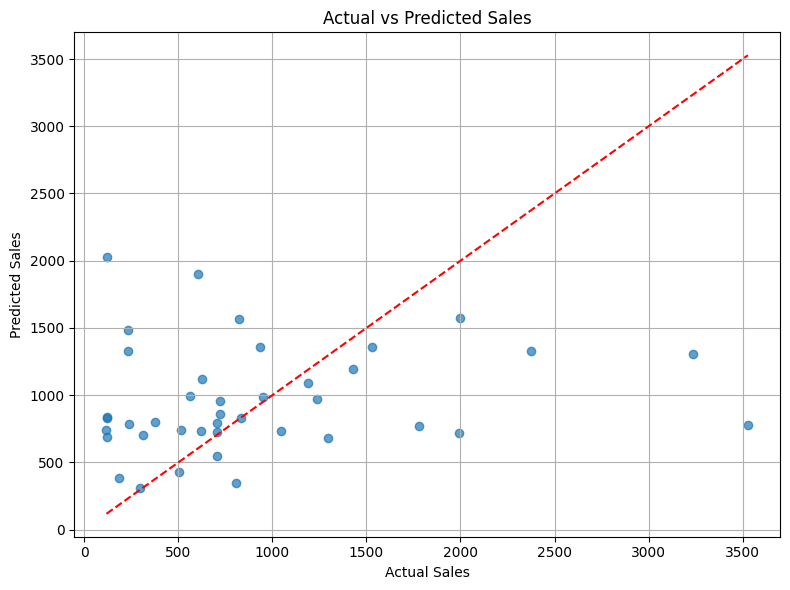

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

**Predict new user input**

In [ ]:
print("\nEnter new data to predict sales:")
sales = float(input("Enter sales: "))
Tv = float(input("Enter expenditure of TV platform): "))
Radio = float(input("Enter expenditure of Radio platform): "))
Newspaper = float(input("Enter expenditure of Newspapers platform): "))
Age = int(input("Enter customer age: "))

new_data = pd.DataFrame({
    'Sales': [sales],
    'TV': [Tv],
    'Radio': [Radio],
    'Newspaper': [Newspaper],
    'Customer_Age': [Age],
})

# Scale the 'Sales' feature in the new data
new_data[['Sales']] = scaler.transform(new_data[['Sales']])


prediction = model.predict(new_data)
print(f"\n📈 Predicted Sales: {prediction[0]:.2f}")


Enter new data to predict sales:
Enter sales: 950
Enter expenditure of TV platform): 250
Enter expenditure of Radio platform): 130
Enter expenditure of Newspapers platform): 125
Enter customer age: 23

📈 Predicted Sales: 1581.50
